In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#path to csv
file = "Resources/education_obesity.csv"
#read csv
education = pd.read_csv(file, encoding="ISO-8859-1")
education.head()

,ï»¿ID,YearStart,YearEnd,Description,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,...,StratificationId2,StratificationCategory3,StratificationCategoryId3,Stratification3,StratificationId3,LocationDisplayOrder,FootnoteSymbol,FootnoteText,URL,FootnoteHeading
0,193290.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,193291.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,193292.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,193293.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,193370.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [3]:
#only obtain relevant columns
clean_education= education[["Description", "LocationDesc", "Class", "Data_Value", "Stratification1"]]
clean_education.tail()

,Description,LocationDesc,Class,Data_Value,Stratification1
220,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop NaNs
clean_education = clean_education.dropna(how='any')
clean_education

,Description,LocationDesc,Class,Data_Value,Stratification1
0,2020.0,National,Obesity / Weight Status,38.8,Less than high school
1,2020.0,National,Obesity / Weight Status,34.0,High school graduate
2,2020.0,National,Obesity / Weight Status,34.1,Some college or technical school
3,2020.0,National,Obesity / Weight Status,25.0,College graduate
4,2020.0,Alabama,Obesity / Weight Status,40.4,Less than high school
...,...,...,...,...,...
211,2020.0,Guam,Obesity / Weight Status,28.2,College graduate
212,2020.0,Puerto Rico,Obesity / Weight Status,31.2,Less than high school
213,2020.0,Puerto Rico,Obesity / Weight Status,32.6,High school graduate
214,2020.0,Puerto Rico,Obesity / Weight Status,31.7,Some college or technical school


In [5]:
#rename columns
clean_education = clean_education.rename(columns={"Description": "Year", 
                                                  "LocationDesc": "State", 
                                                  "Data_Value": "Obese Average (%)", 
                                                  "Stratification1": "Education Level"})
clean_education

,Year,State,Class,Obese Average (%),Education Level
0,2020.0,National,Obesity / Weight Status,38.8,Less than high school
1,2020.0,National,Obesity / Weight Status,34.0,High school graduate
2,2020.0,National,Obesity / Weight Status,34.1,Some college or technical school
3,2020.0,National,Obesity / Weight Status,25.0,College graduate
4,2020.0,Alabama,Obesity / Weight Status,40.4,Less than high school
...,...,...,...,...,...
211,2020.0,Guam,Obesity / Weight Status,28.2,College graduate
212,2020.0,Puerto Rico,Obesity / Weight Status,31.2,Less than high school
213,2020.0,Puerto Rico,Obesity / Weight Status,32.6,High school graduate
214,2020.0,Puerto Rico,Obesity / Weight Status,31.7,Some college or technical school


In [6]:
#remove "national" row
state_education = clean_education.drop(clean_education.index[[0,1,2,3]])
state_education

,Year,State,Class,Obese Average (%),Education Level
4,2020.0,Alabama,Obesity / Weight Status,40.4,Less than high school
5,2020.0,Alabama,Obesity / Weight Status,39.6,High school graduate
6,2020.0,Alabama,Obesity / Weight Status,40.1,Some college or technical school
7,2020.0,Alabama,Obesity / Weight Status,36.1,College graduate
8,2020.0,Alaska,Obesity / Weight Status,29.6,Less than high school
...,...,...,...,...,...
211,2020.0,Guam,Obesity / Weight Status,28.2,College graduate
212,2020.0,Puerto Rico,Obesity / Weight Status,31.2,Less than high school
213,2020.0,Puerto Rico,Obesity / Weight Status,32.6,High school graduate
214,2020.0,Puerto Rico,Obesity / Weight Status,31.7,Some college or technical school


In [7]:
#sort obesity from lowest to highest
best = state_education.sort_values("Obese Average (%)")
best

,Year,State,Class,Obese Average (%),Education Level
39,2020.0,District of Columbia,Obesity / Weight Status,16.4,College graduate
27,2020.0,Colorado,Obesity / Weight Status,18.2,College graduate
51,2020.0,Hawaii,Obesity / Weight Status,18.8,College graduate
187,2020.0,Vermont,Obesity / Weight Status,19.1,College graduate
23,2020.0,California,Obesity / Weight Status,19.6,College graduate
...,...,...,...,...,...
102,2020.0,Mississippi,Obesity / Weight Status,42.2,Some college or technical school
78,2020.0,Louisiana,Obesity / Weight Status,42.8,Some college or technical school
56,2020.0,Illinois,Obesity / Weight Status,44.1,Less than high school
20,2020.0,California,Obesity / Weight Status,44.5,Less than high school


In [8]:
#sort obesity from highest to lowest in less than high school
worst_less_HS = state_education.loc[state_education["Education Level"] == "Less than high school"]
worst_1 = worst_less_HS.sort_values("Obese Average (%)", ascending=False)
worst_1 = worst_1.set_index("State")
worst_1

,Year,Class,Obese Average (%),Education Level
State,,,,
Texas,2020.0,Obesity / Weight Status,44.5,Less than high school
California,2020.0,Obesity / Weight Status,44.5,Less than high school
Illinois,2020.0,Obesity / Weight Status,44.1,Less than high school
South Dakota,2020.0,Obesity / Weight Status,42.1,Less than high school
Delaware,2020.0,Obesity / Weight Status,41.3,Less than high school
Georgia,2020.0,Obesity / Weight Status,40.6,Less than high school
Alabama,2020.0,Obesity / Weight Status,40.4,Less than high school
Connecticut,2020.0,Obesity / Weight Status,40.0,Less than high school
Tennessee,2020.0,Obesity / Weight Status,39.5,Less than high school


In [9]:
worst_HS = state_education.loc[state_education["Education Level"] == "High school graduate"]
worst_2 = worst_HS.sort_values("Obese Average (%)", ascending=False)
worst_2 = worst_2.set_index("State")
worst_2

,Year,Class,Obese Average (%),Education Level
State,,,,
Mississippi,2020.0,Obesity / Weight Status,41.4,High school graduate
West Virginia,2020.0,Obesity / Weight Status,40.7,High school graduate
Alabama,2020.0,Obesity / Weight Status,39.6,High school graduate
Guam,2020.0,Obesity / Weight Status,39.3,High school graduate
Oklahoma,2020.0,Obesity / Weight Status,39.0,High school graduate
Louisiana,2020.0,Obesity / Weight Status,38.9,High school graduate
Kentucky,2020.0,Obesity / Weight Status,38.4,High school graduate
Iowa,2020.0,Obesity / Weight Status,38.0,High school graduate
Arkansas,2020.0,Obesity / Weight Status,37.8,High school graduate


In [10]:
worst_technical = state_education.loc[state_education["Education Level"] == "Some college or technical school"]
worst_3 = worst_technical.sort_values("Obese Average (%)", ascending=False)
worst_3 = worst_3.set_index("State")
worst_3

,Year,Class,Obese Average (%),Education Level
State,,,,
Louisiana,2020.0,Obesity / Weight Status,42.8,Some college or technical school
Mississippi,2020.0,Obesity / Weight Status,42.2,Some college or technical school
West Virginia,2020.0,Obesity / Weight Status,40.8,Some college or technical school
Arkansas,2020.0,Obesity / Weight Status,40.3,Some college or technical school
Alabama,2020.0,Obesity / Weight Status,40.1,Some college or technical school
Iowa,2020.0,Obesity / Weight Status,39.2,Some college or technical school
Indiana,2020.0,Obesity / Weight Status,38.8,Some college or technical school
Kansas,2020.0,Obesity / Weight Status,38.8,Some college or technical school
Kentucky,2020.0,Obesity / Weight Status,38.8,Some college or technical school


In [11]:
worst_college = state_education.loc[state_education["Education Level"] == "College graduate"]
worst_4 = worst_college.sort_values("Obese Average (%)", ascending=False)
worst_4 = worst_4.set_index("State")
worst_4

,Year,Class,Obese Average (%),Education Level
State,,,,
Alabama,2020.0,Obesity / Weight Status,36.1,College graduate
West Virginia,2020.0,Obesity / Weight Status,34.9,College graduate
Kentucky,2020.0,Obesity / Weight Status,34.4,College graduate
Indiana,2020.0,Obesity / Weight Status,33.8,College graduate
Ohio,2020.0,Obesity / Weight Status,33.4,College graduate
Mississippi,2020.0,Obesity / Weight Status,33.2,College graduate
South Carolina,2020.0,Obesity / Weight Status,32.7,College graduate
Oklahoma,2020.0,Obesity / Weight Status,32.7,College graduate
Delaware,2020.0,Obesity / Weight Status,32.2,College graduate


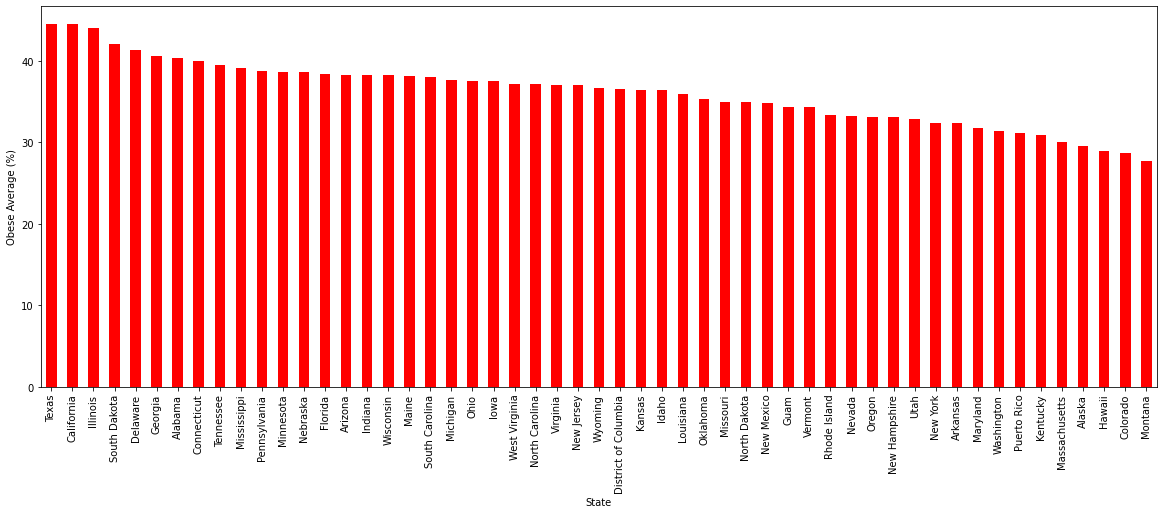

In [12]:
#less than highschool 
worst_1["Obese Average (%)"].plot(kind ="bar", color="red", figsize=(20,7))
plt.xlabel("State")
plt.ylabel("Obese Average (%)")
plt.savefig("Resources/less_HS.png")
plt.show()

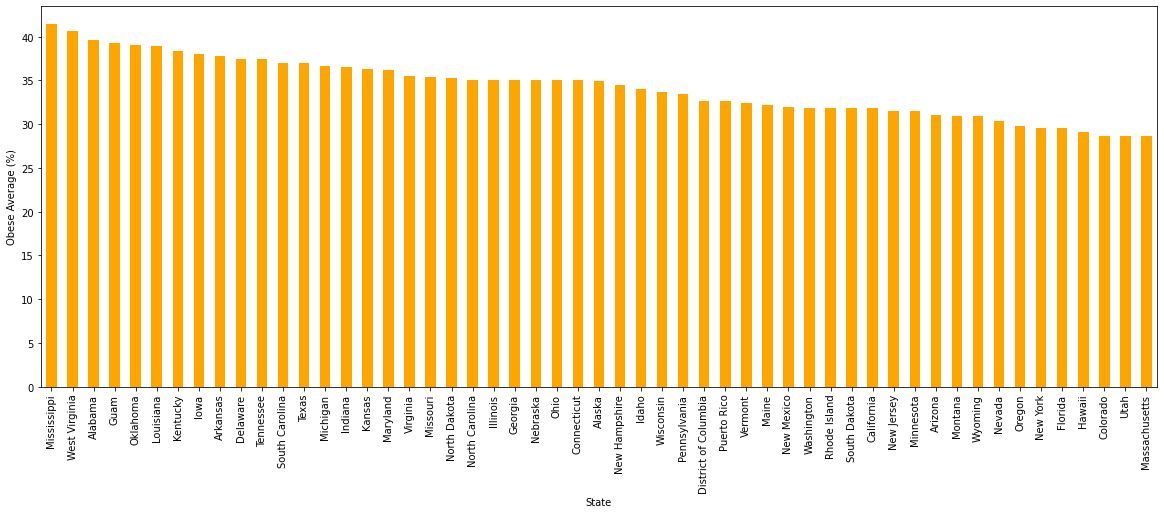

In [13]:
#High school
worst_2["Obese Average (%)"].plot(kind ="bar", color="orange", figsize=(20,7))
plt.xlabel("State")
plt.ylabel("Obese Average (%)")
plt.savefig("Resources/HS.png")
plt.show()

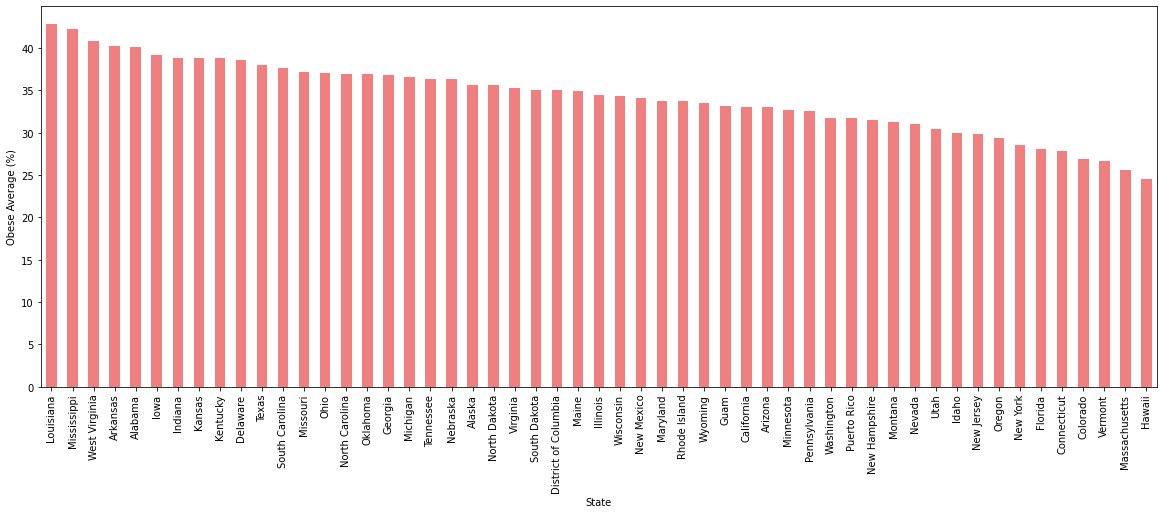

In [14]:
#Some college or technical school
worst_3["Obese Average (%)"].plot(kind ="bar", color="lightcoral", figsize=(20,7))
plt.xlabel("State")
plt.ylabel("Obese Average (%)")
plt.savefig("Resources/technical.png")
plt.show()

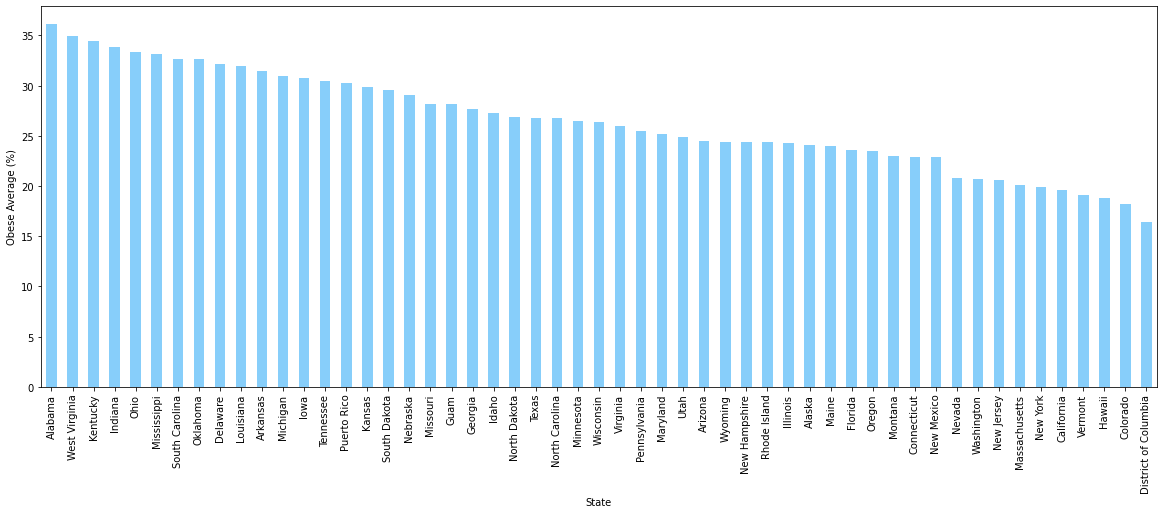

In [15]:
#college
worst_4["Obese Average (%)"].plot(kind ="bar", color="lightskyblue", figsize=(20,7))
plt.xlabel("State")
plt.ylabel("Obese Average (%)")
plt.savefig("Resources/college.png")
plt.show()

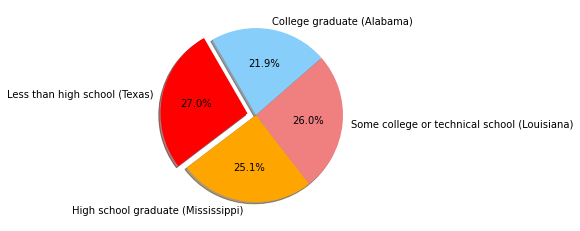

In [16]:
#labels for the sections of our pie chart
labels = ["Less than high school (Texas)", "High school graduate (Mississippi)", "Some college or technical school (Louisiana)", "College graduate (Alabama)"]

#the values of each section of the pie chart
sizes = [44.5, 41.4, 42.8, 36.1]

#the colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

#tells matplotlib to separate the "less than high school" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.savefig("Resources/education_pie.png")